<a href="https://colab.research.google.com/github/JUEvelyn59/AppliedDS-Project1/blob/main/Project_1_Jiahui_Zhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anndata
!pip install 'scanpy[leiden]'
!pip install louvain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=545706ec94734f75dc4bb5d552d73c3eef6c006f82af18d0c8c7dc87ab0dbc40
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [2]:
pip install torch --upgrade

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch
import scanpy as sc
extract_dir = "/content/drive/MyDrive/STAT5243 Jiahui Zhu/Frogtail_files/"
adata = sc.read_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

# Data Processing

Selecting timepoint 0 (Day of amputation)

In [6]:
adata = adata[adata.obs['DaysPostAmputation'] == 0] # Subset on the time point 0
adata.layers['counts'] = adata.X.copy() # Copy the raw counts in a different layer

<ipython-input-6-88f00e64bca0>:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X.copy() # Copy the raw counts in a different layer


Normalize data

In [108]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


Filtering genes:

1. filter out by highly expressed and lowly expressed
2. Highly variable genes were selected



In [109]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

filtered out 7351 genes that are detected in less than 3 cells
extracting highly variable genes
    finished (0:00:00)


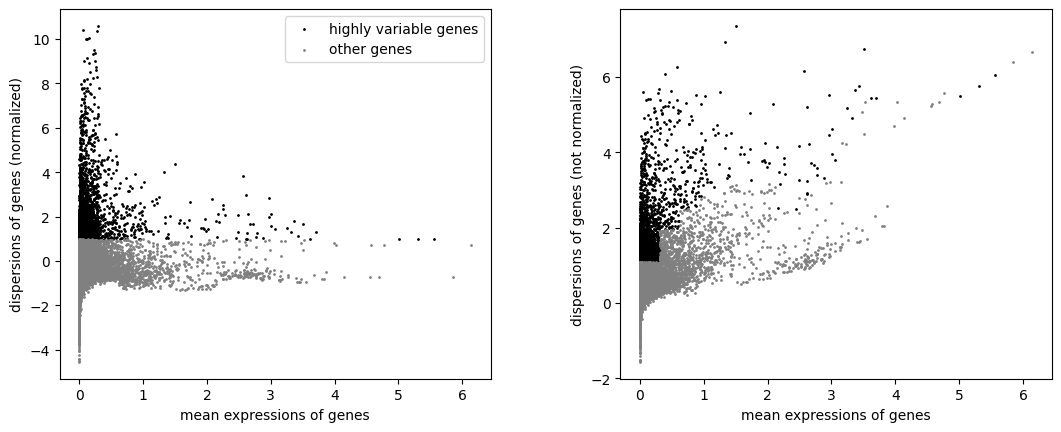

In [110]:
sc.pl.highly_variable_genes(adata)

In [111]:
hvg_adata = adata[:, adata.var['highly_variable']]
hvg_adata

View of AnnData object with n_obs × n_vars = 5302 × 2300
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [112]:
hvg_adata.var

n_cells  highly_variable     means  dispersions  \
syp.L                  398             True  0.320848     2.246379   
mcam.S                  87             True  0.020336     1.460666   
ifnlr1.L               348             True  0.117584     1.213378   
frem2.1.L              328             True  0.284445     2.663300   
Xelaev18000156m.g      169             True  0.073170     1.196274   
...                    ...              ...       ...          ...   
Xelaev18047861m.g      353             True  1.507200     7.353400   
cldn6.2.S              596             True  0.359704     2.110119   
cldn6.1.S              950             True  0.816413     2.940419   
eln2.S                 125             True  0.238280     4.144101   
loc101734287.S          24             True  0.007959     1.267460   

                   dispersions_norm  
syp.L                      1.295758  
mcam.S                     1.775592  
ifnlr1.L                   1.259536  
frem2.1.L                  4.285322  
Xelaev18000156m.g          1.223843  
...                             ...  
Xelaev18047861m.g          4.353726  
cldn6.2.S                  1.145952  
cldn6.1.S                  1.409268  
eln2.S                     7.375548  
loc101734287.S             1.372398  

[2300 rows x 5 columns]

Scale the data

In [113]:
sc.pp.scale(hvg_adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Principle Component analysis

In [114]:
sc.tl.pca(hvg_adata)
sc.pp.pca(hvg_adata)

computing PCA
    with n_comps=50
    finished (0:00:06)
computing PCA
    with n_comps=50
    finished (0:00:07)


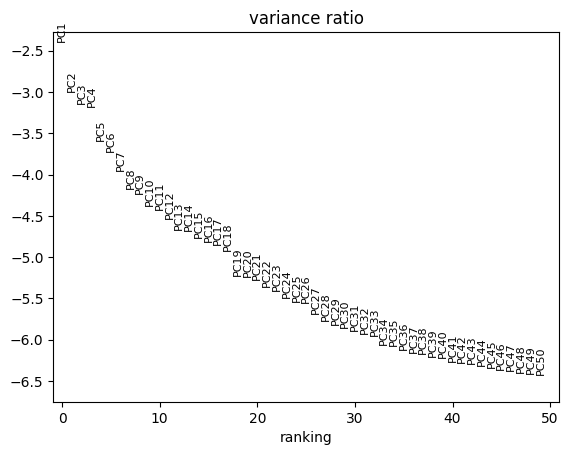

In [115]:
sc.pl.pca_variance_ratio(hvg_adata, log=True,n_pcs=50)

# Data Visualization

In [116]:
sc.pp.neighbors(hvg_adata, n_neighbors=20, n_pcs=40, random_state= 12) # random_state as in originial paper

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


In [117]:
sc.tl.umap(hvg_adata, min_dist = 0.5, random_state= 12) # min_dist and random_state as in original paper

computing UMAP
    finished (0:00:21)


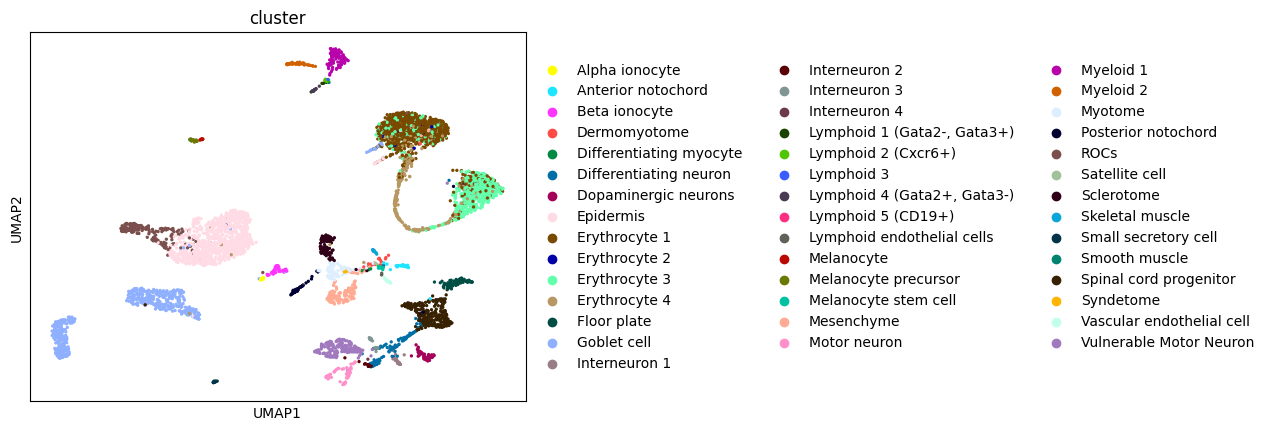

In [118]:
sc.pl.umap(
    hvg_adata,
    color = ['cluster'], # clusters in paper,
)

In [119]:
hvg_adata.obs['cluster'].unique()

['Differentiating neuron', 'Erythrocyte 1', 'Erythrocyte 3', 'Spinal cord progenitor', 'Erythrocyte 4', ..., 'Syndetome', 'Interneuron 4', 'Alpha ionocyte', 'Beta ionocyte', 'Lymphoid 3']
Length: 43
Categories (43, object): ['Alpha ionocyte', 'Anterior notochord', 'Beta ionocyte', 'Dermomyotome', ...,
                          'Spinal cord progenitor', 'Syndetome', 'Vascular endothelial cell',
                          'Vulnerable Motor Neuron']

In [120]:
categories = {
    'Somite and others': ['Skeletal muscle', 'Smooth muscle', 'Sclerotome','Syndetome','Myotome', 'Mesenchyme','Anterior notochord','Posterior notochord','Satellite cell', 'Dermomyotome',
'Vascular endothelial cell','Lymphoid endothelial cells','Differentiating myocyte'],
    'Skin': ['Epidermis', 'ROCs', 'Melanocyte', 'Goblet cell','Beta ionocyte','Alpha ionocyte','Melanocyte precursor'
,'Melanocyte stem cell','Small secretory cell','laminin-rich epidermis'],
    'Neural': ['Motor neuron', 'Spinal cord progenitor', 'Differentiating neuron', 'Dopaminergic neurons','Interneuron 1','Interneuron 2','Interneuron 3','Interneuron 4','Floor plate','Oligodendrocyte','Vulnerable Motor Neuron','Motor neuron (leptin+)'],
    'Immune': ['Lymphoid 1 (Gata2-, Gata3+)','Lymphoid 2 (Cxcr6+)','Lymphoid 3','Lymphoid 4 (Gata2+, Gata3-)','Lymphoid 5 (CD19+)','Myeloid 1','Myeloid 2'],
    'Red blood cells': ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3','Erythrocyte 4']
}

Replicate of Figure 1B

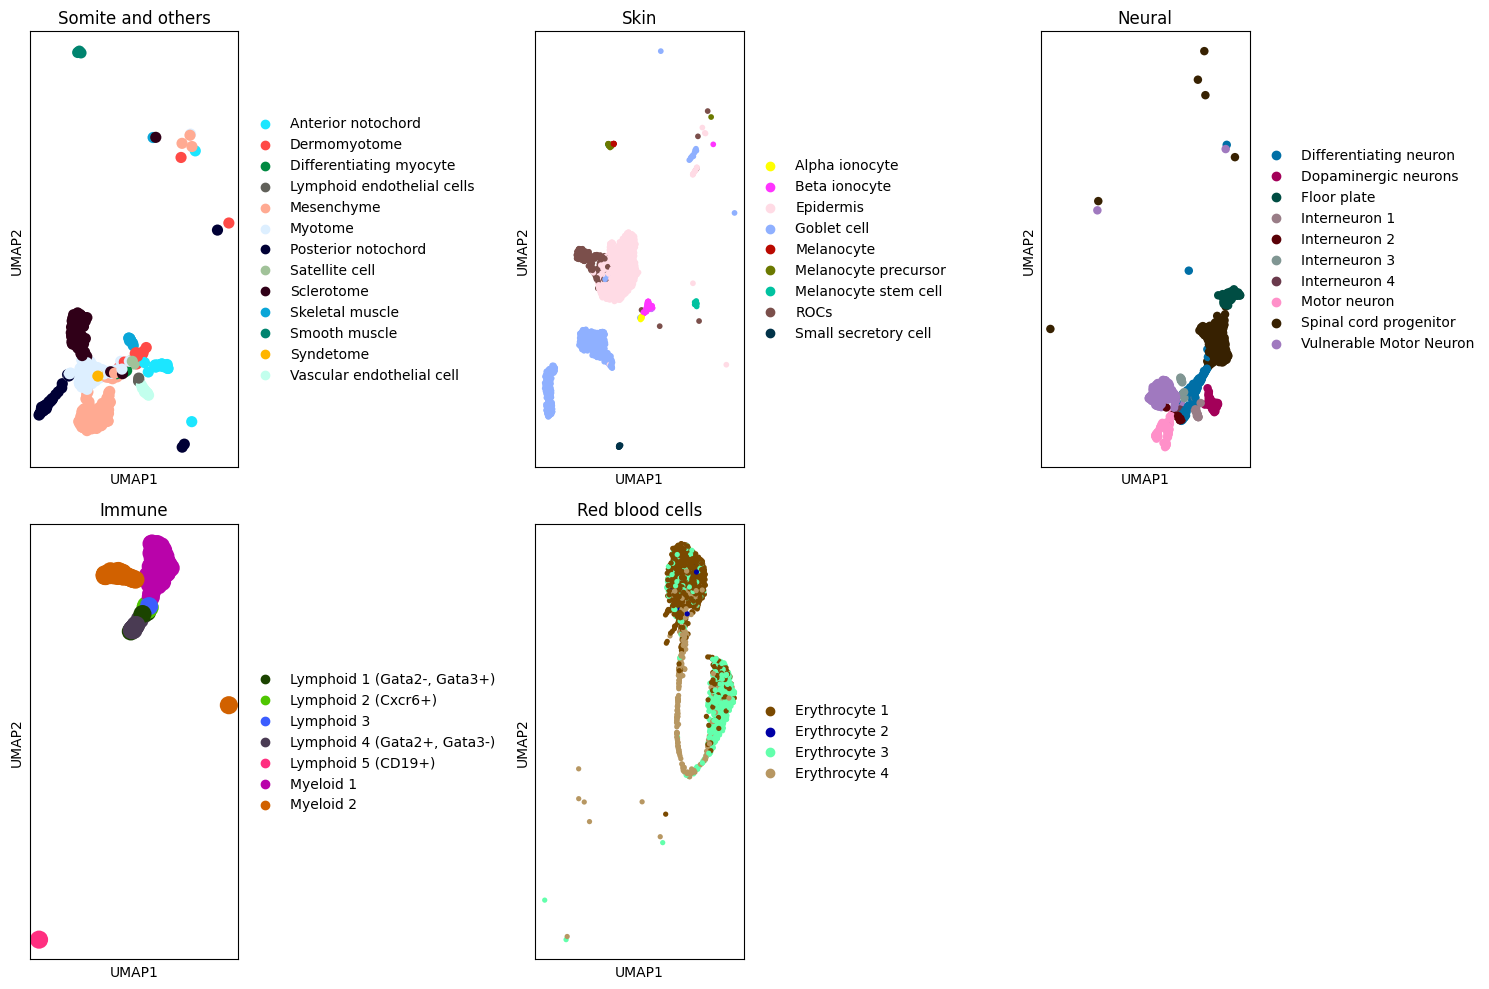

In [121]:
import matplotlib.pyplot as plt
import scanpy as sc

num_categories = len(categories)
fig, axes = plt.subplots(2, (num_categories + 1) // 2, figsize=(15, 10))  # two rows
axes = axes.flatten()

for idx, (category, cluster) in enumerate(categories.items()):
    subset = hvg_adata[hvg_adata.obs['cluster'].isin(cluster), :]
    sc.pl.umap(subset, color='cluster', title=category, ax=axes[idx], show=False)
if num_categories % 2 != 0:
    fig.delaxes(axes[-1])

output_filename = 'Figure_1.png'
plt.savefig(output_filename)

plt.tight_layout()
plt.show()


# Clustering Analysis

## Ledien clustering

In [122]:
sc.pp.neighbors(hvg_adata, n_neighbors=20, n_pcs=40, random_state=3)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


In [123]:
sc.tl.umap(hvg_adata,min_dist = 0.5, random_state=3)

computing UMAP
    finished (0:00:12)


Grid search to fine best value for resolution parameter

In [155]:
import numpy as np
from sklearn.metrics import silhouette_score

silhouette_scores = []
umap_coords = hvg_adata.obsm['X_umap']
resolutions = np.arange(0.1, 2.0, 0.1)

for res in resolutions:
    sc.tl.leiden(
        hvg_adata,
        key_added=f"leiden_res_{res:4.2f}",
        resolution=res,
        flavor="igraph",
        random_state=8,
        n_iterations=2
    )
    labels = hvg_adata.obs[f"leiden_res_{res:4.2f}"]
    score = silhouette_score(umap_coords, labels)
    silhouette_scores.append((res, score))

running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)


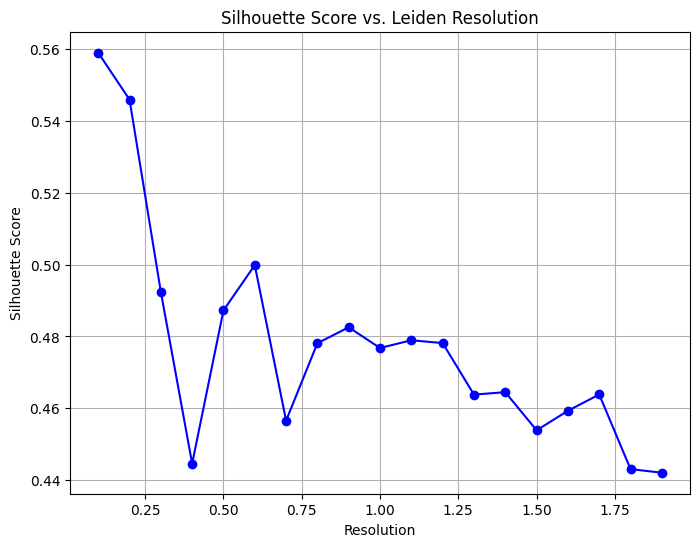

In [156]:
import matplotlib.pyplot as plt

resolutions, scores = zip(*silhouette_scores)

plt.figure(figsize=(8, 6))
plt.plot(resolutions, scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Leiden Resolution')
plt.xlabel('Resolution')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [157]:
for res in [0.1, 0.5, 0.6, 1.7]:
    sc.tl.leiden(
        hvg_adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph", random_state = 8, n_iterations=2
    )

running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)


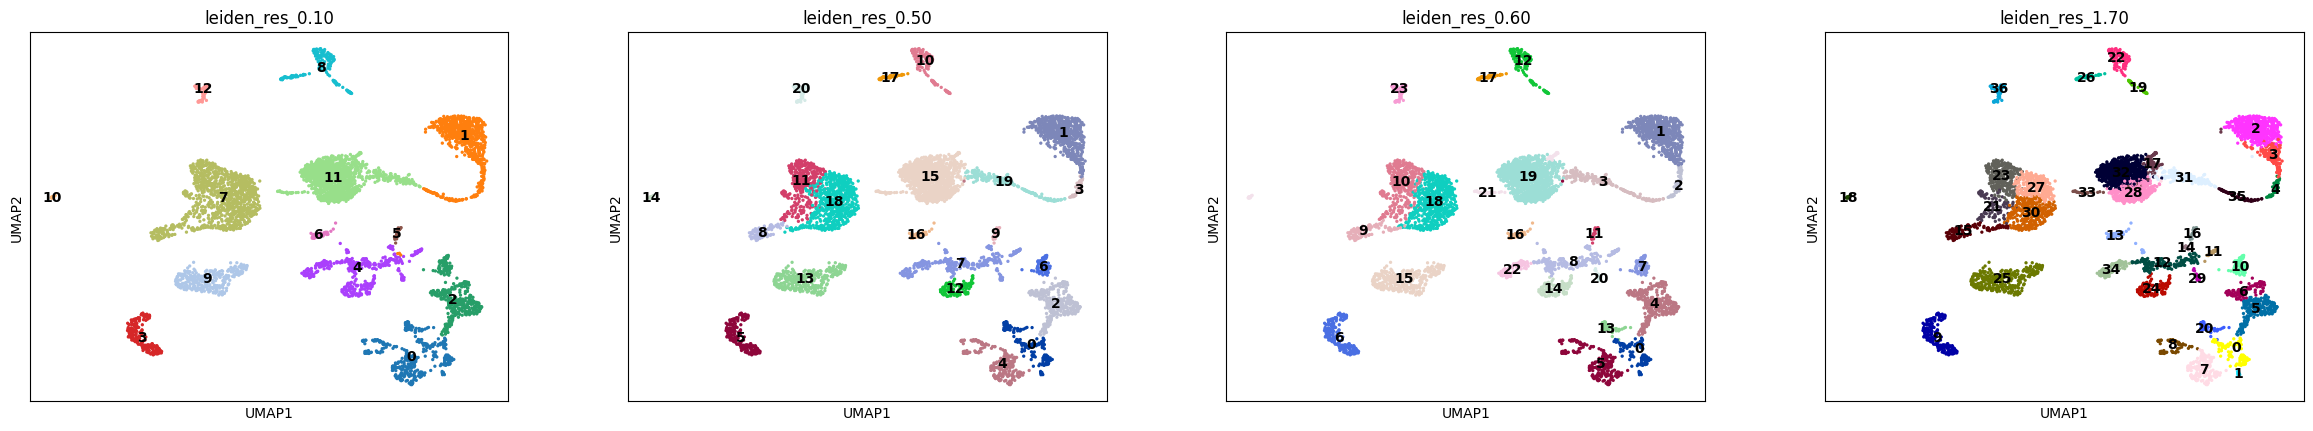

In [158]:
sc.pl.umap(
    hvg_adata,
    color=["leiden_res_0.10", "leiden_res_0.50","leiden_res_0.60", "leiden_res_1.70"],
    legend_loc="on data",
)

In the highest resolution, it is over-clustered, while the lowest resolution is likely grouping cells which belong to distinct cell identities. And the clusters with resolution 0.6 best appromiate the clusters in the paper.

- comparison between the clusters in the paper v.s. leiden clustering

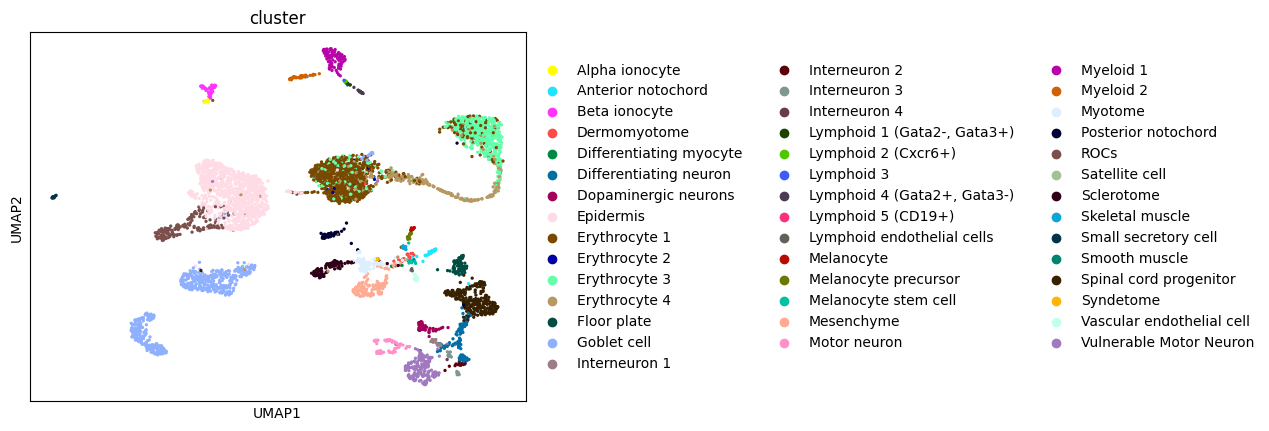

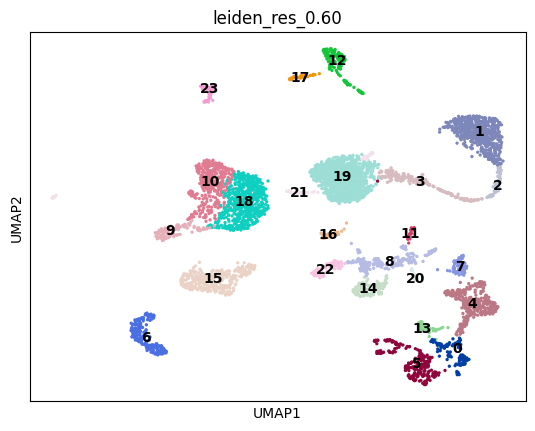

In [159]:
sc.pl.umap(
    hvg_adata,
    color = ['cluster'], # clusters in paper
)
sc.pl.umap(
    hvg_adata,
    color=["leiden_res_0.60"],
    legend_loc="on data",
)

## Louvain clustering

In [160]:
import numpy as np
from sklearn.metrics import silhouette_score

silhouette_scores = []
umap_coords = hvg_adata.obsm['X_umap']
resolutions = np.arange(0.1, 2.0, 0.1)

for res in resolutions:
    sc.tl.louvain(
        hvg_adata,
        key_added=f"louvain_res_{res:4.2f}",
        resolution=res,
        random_state=8,
    )
    labels = hvg_adata.obs[f"louvain_res_{res:4.2f}"]
    score = silhouette_score(umap_coords, labels)
    silhouette_scores.append((res, score))

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clus

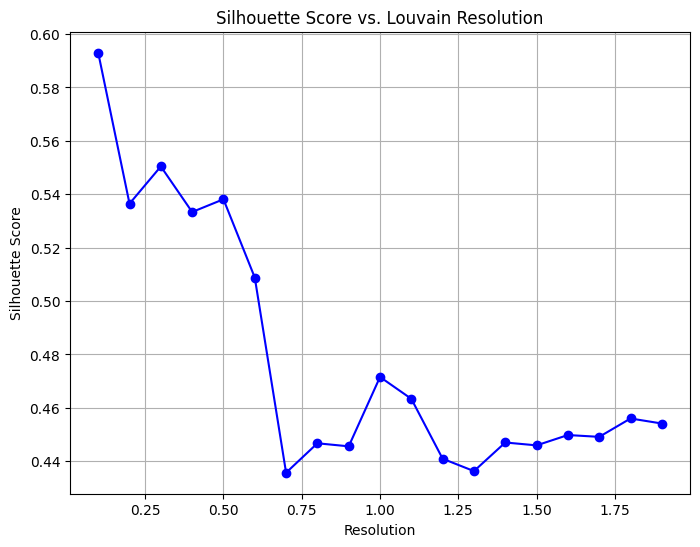

In [161]:
import matplotlib.pyplot as plt

resolutions, scores = zip(*silhouette_scores)

plt.figure(figsize=(8, 6))
plt.plot(resolutions, scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Louvain Resolution')
plt.xlabel('Resolution')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [164]:
for res in [0.1, 0.5, 0.6, 1.0]:
    sc.tl.louvain(
        hvg_adata, key_added=f"louvain_res_{res:4.2f}", resolution=res, random_state = 8
    )

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)


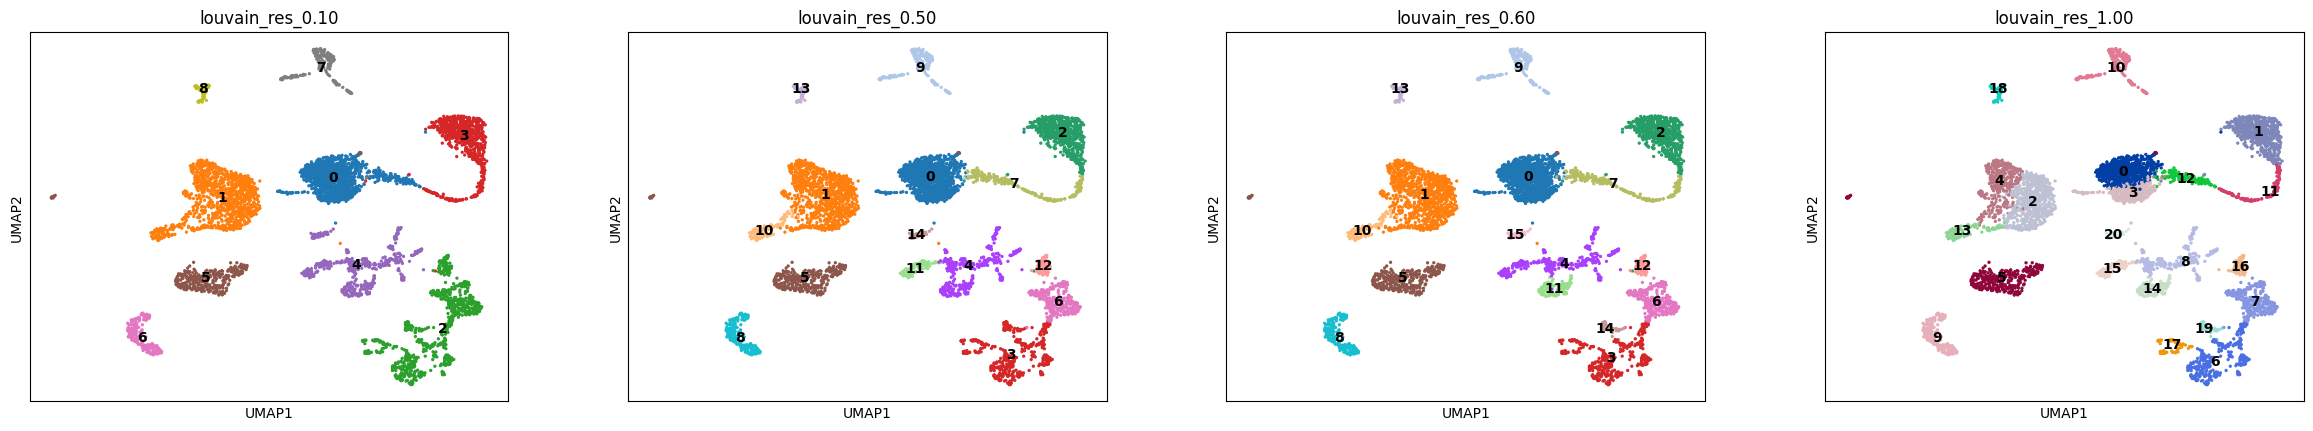

In [165]:
sc.pl.umap(
    hvg_adata,
    color=["louvain_res_0.10","louvain_res_0.50", "louvain_res_0.60", "louvain_res_1.00"],
    legend_loc="on data",
)

- comparison between the clusters in the paper v.s. ledien clustering v.s. louvain

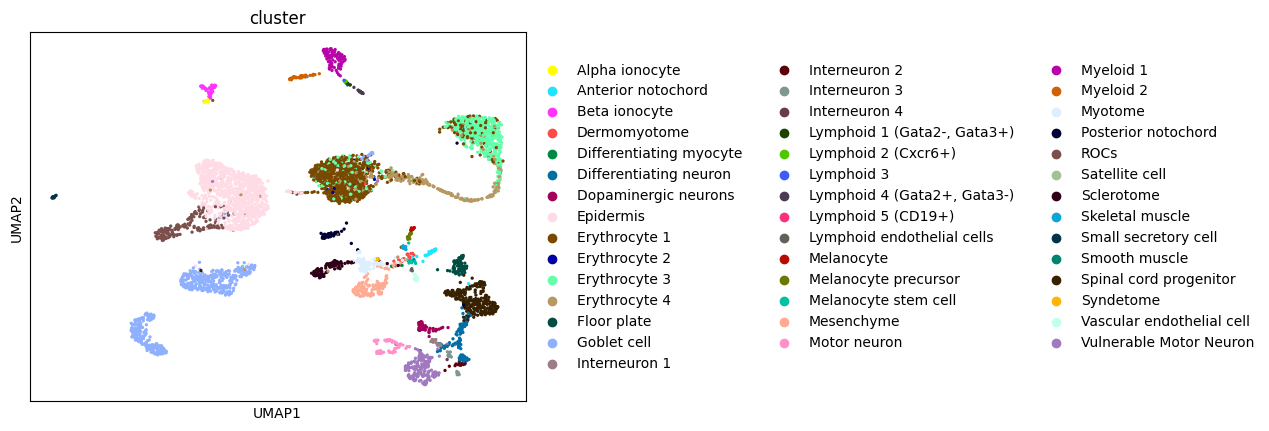

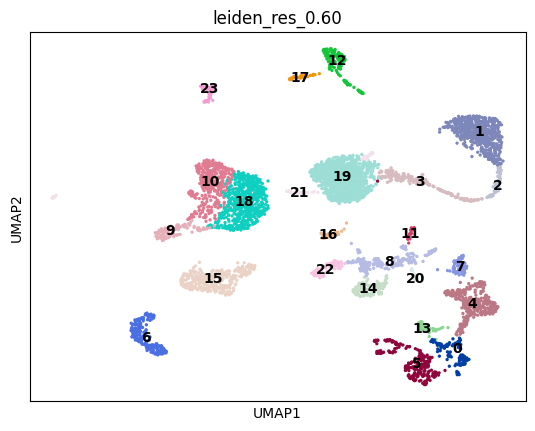

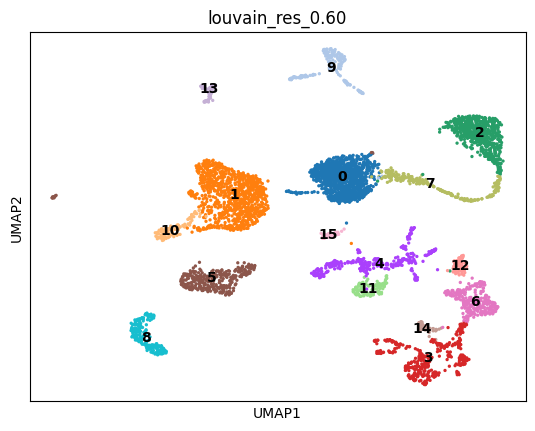

In [166]:
sc.pl.umap(
    hvg_adata,
    color = ['cluster'], # clusters in paper
)
sc.pl.umap(
    hvg_adata,
    color=["leiden_res_0.60"],
    legend_loc="on data",
)
sc.pl.umap(
    hvg_adata,
    color=["louvain_res_0.60"],
    legend_loc="on data",
)

Ledien clustering gives more clusters than louvain clustering in the same resulotion

## Performance metric

In [167]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

### 1. Silhouette score


In [168]:
ground_truth_labels = hvg_adata.obs['cluster']
louvain_labels = hvg_adata.obs['louvain_res_0.60']
leiden_labels = hvg_adata.obs['leiden_res_0.60']
umap_coords = hvg_adata.obsm['X_umap']

paper_silhouette = silhouette_score(umap_coords, ground_truth_labels)
louvain_silhouette = silhouette_score(umap_coords, louvain_labels)
leiden_silhouette = silhouette_score(umap_coords, leiden_labels)

print(f"Silhouette Score of clustering in paper: {paper_silhouette:.4f}")
print(f"Louvain Silhouette Score: {louvain_silhouette:.4f}")
print(f"Leiden Silhouette Score: {leiden_silhouette:.4f}")

Silhouette Score of clustering in paper: 0.2558
Louvain Silhouette Score: 0.5088
Leiden Silhouette Score: 0.4998


### 2. RAND-Index

In [169]:
from scipy.special import comb
import numpy as np
def rand_index(labels_true, labels_pred):
    tp_plus_fp = comb(np.bincount(labels_pred), 2).sum()
    tp_plus_fn = comb(np.bincount(labels_true), 2).sum()

    A = np.c_[(labels_true, labels_pred)]
    contingency_table = np.array([np.bincount(A[A[:, 0] == i, 1], minlength=len(np.unique(labels_pred)))
                                  for i in np.unique(labels_true)])

    tp = comb(contingency_table, 2).sum()
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(labels_true), 2) - tp - fp - fn

    return (tp + tn) / (tp + fp + fn + tn)

ground_truth_labels = hvg_adata.obs['cluster'].astype('category').cat.codes

louvain_labels = hvg_adata.obs['louvain_res_0.50'].astype('category').cat.codes
leiden_labels = hvg_adata.obs['leiden_res_0.50'].astype('category').cat.codes

louvain_ri = rand_index(ground_truth_labels, louvain_labels)
leiden_ri = rand_index(ground_truth_labels, leiden_labels)

print(f"Louvain Rand Index (RI): {louvain_ri:.4f}")
print(f"Leiden Rand Index (RI): {leiden_ri:.4f}")

Louvain Rand Index (RI): 0.9354
Leiden Rand Index (RI): 0.9278


In [170]:

louvain_ari = adjusted_rand_score(ground_truth_labels, louvain_labels)
leiden_ari = adjusted_rand_score(ground_truth_labels, leiden_labels)

print(f"Louvain Adjusted Rand Index (ARI): {louvain_ari:.4f}")
print(f"Leiden Adjusted Rand Index (ARI): {leiden_ari:.4f}")

Louvain Adjusted Rand Index (ARI): 0.6942
Leiden Adjusted Rand Index (ARI): 0.6312


### 3. Davies-Bouldin Index


The Davies-Bouldin Index is computed as follows:

$$
\text{DBI} = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \frac{d_i + d_j}{D_{ij}}
$$

Where:

- \( N \) is the number of clusters.
- \( d_i \) and \( d_j \) are the intra-cluster distances for clusters \( i \) and \( j \), which measure how compact the clusters are.
- \( D_{ij} \) is the inter-cluster distance between clusters \( i \) and \( j \), measuring how far apart the clusters are.
- The \( \max \) operation selects the cluster \( j \) that is closest to cluster \( i \) when considering the ratio of intra-cluster to inter-cluster distances.

 It evaluates how well clusters are separated and how compact they are. A lower DBI value indicates better clustering quality.

In [171]:
from sklearn.metrics import davies_bouldin_score
paper_dbi = davies_bouldin_score(umap_coords, ground_truth_labels)
ledien_dbi = davies_bouldin_score(umap_coords, leiden_labels)
louvain_dbi = davies_bouldin_score(umap_coords, louvain_labels)

print(f"Davies-Bouldin Index (Paper Clustering): {paper_dbi:.4f}")
print(f"Davies-Bouldin Index (Louvain Clustering): {louvain_dbi:.4f}")
print(f"Davies-Bouldin Index (Ledien Clustering): {ledien_dbi:.4f}")

Davies-Bouldin Index (Paper Clustering): 1.6732
Davies-Bouldin Index (Louvain Clustering): 0.5671
Davies-Bouldin Index (Ledien Clustering): 0.7014


Louvian performs the best, so we will use louvain to find marker genes

# Marker Identification

## 1. Logistic Regression

### Louvain Clustering

In [172]:
sc.tl.rank_genes_groups(hvg_adata, groupby="louvain_res_0.60", method="logreg", max_iter = 1000)

ranking genes
    finished (0:00:06)


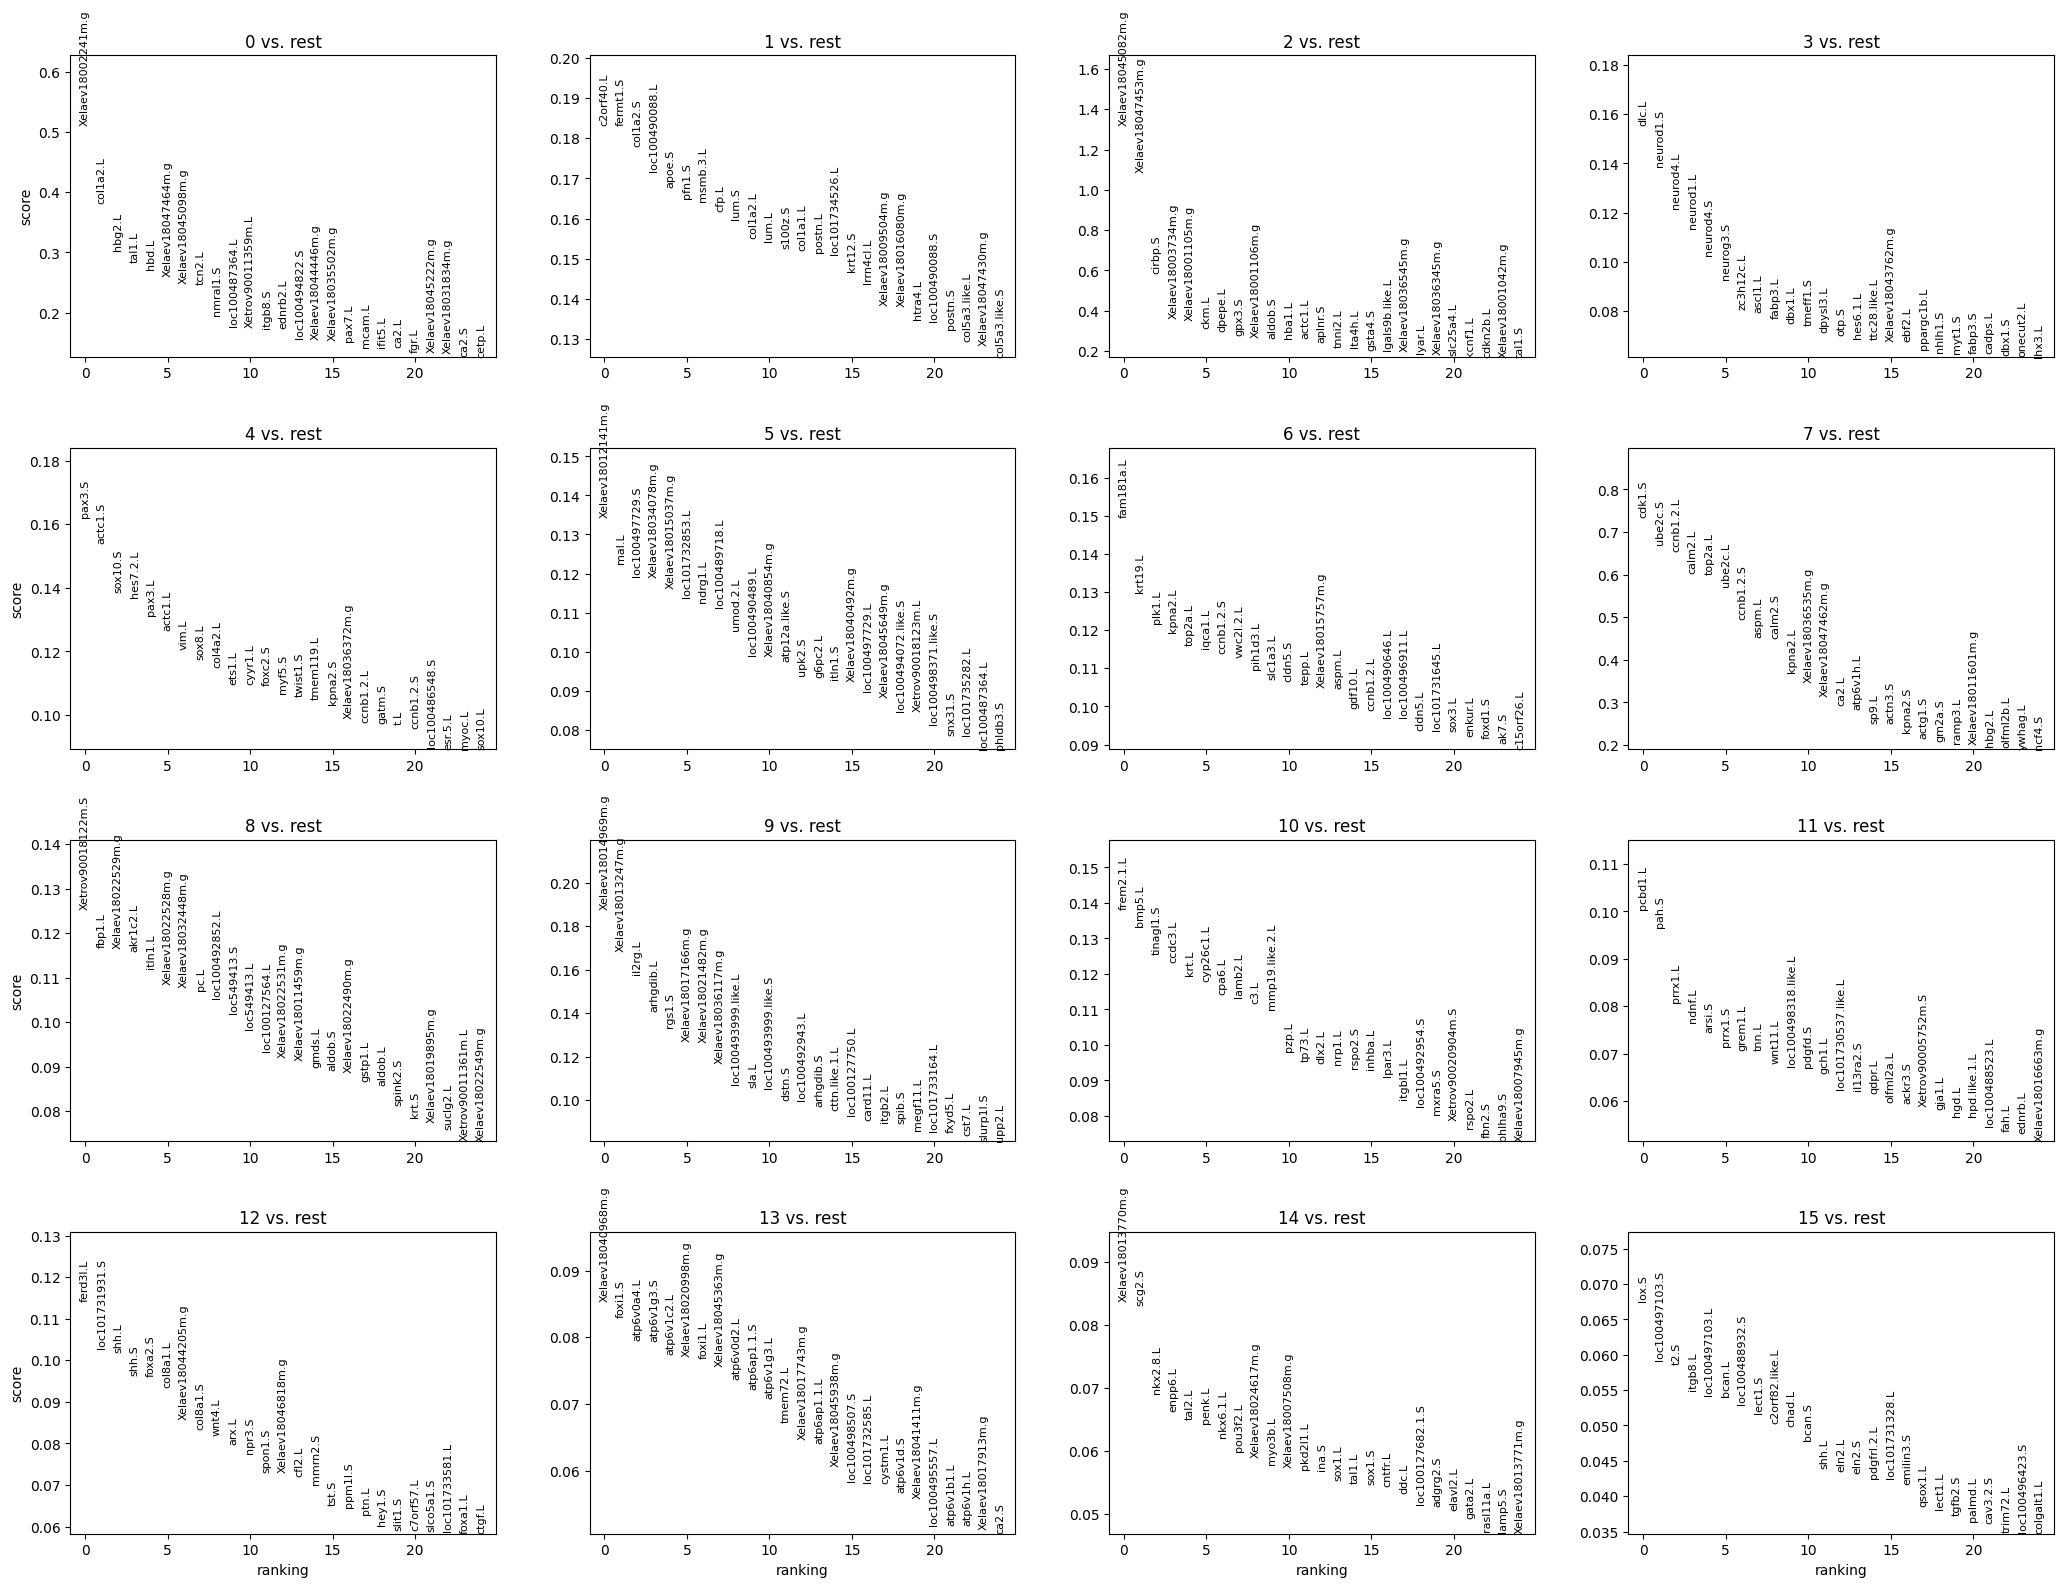

In [173]:
sc.pl.rank_genes_groups(hvg_adata, n_genes=25, sharey=False)

In [174]:
sc.settings.verbosity = 2  # reduce the verbosity

In [175]:
roc_markers_logist = hvg_adata.uns['rank_genes_groups']['names']['10'][:50]

## 2. T-test

In [177]:
sc.tl.rank_genes_groups(hvg_adata, groupby="louvain_res_0.60", method="t-test")

ranking genes


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

    finished (0:00:03)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

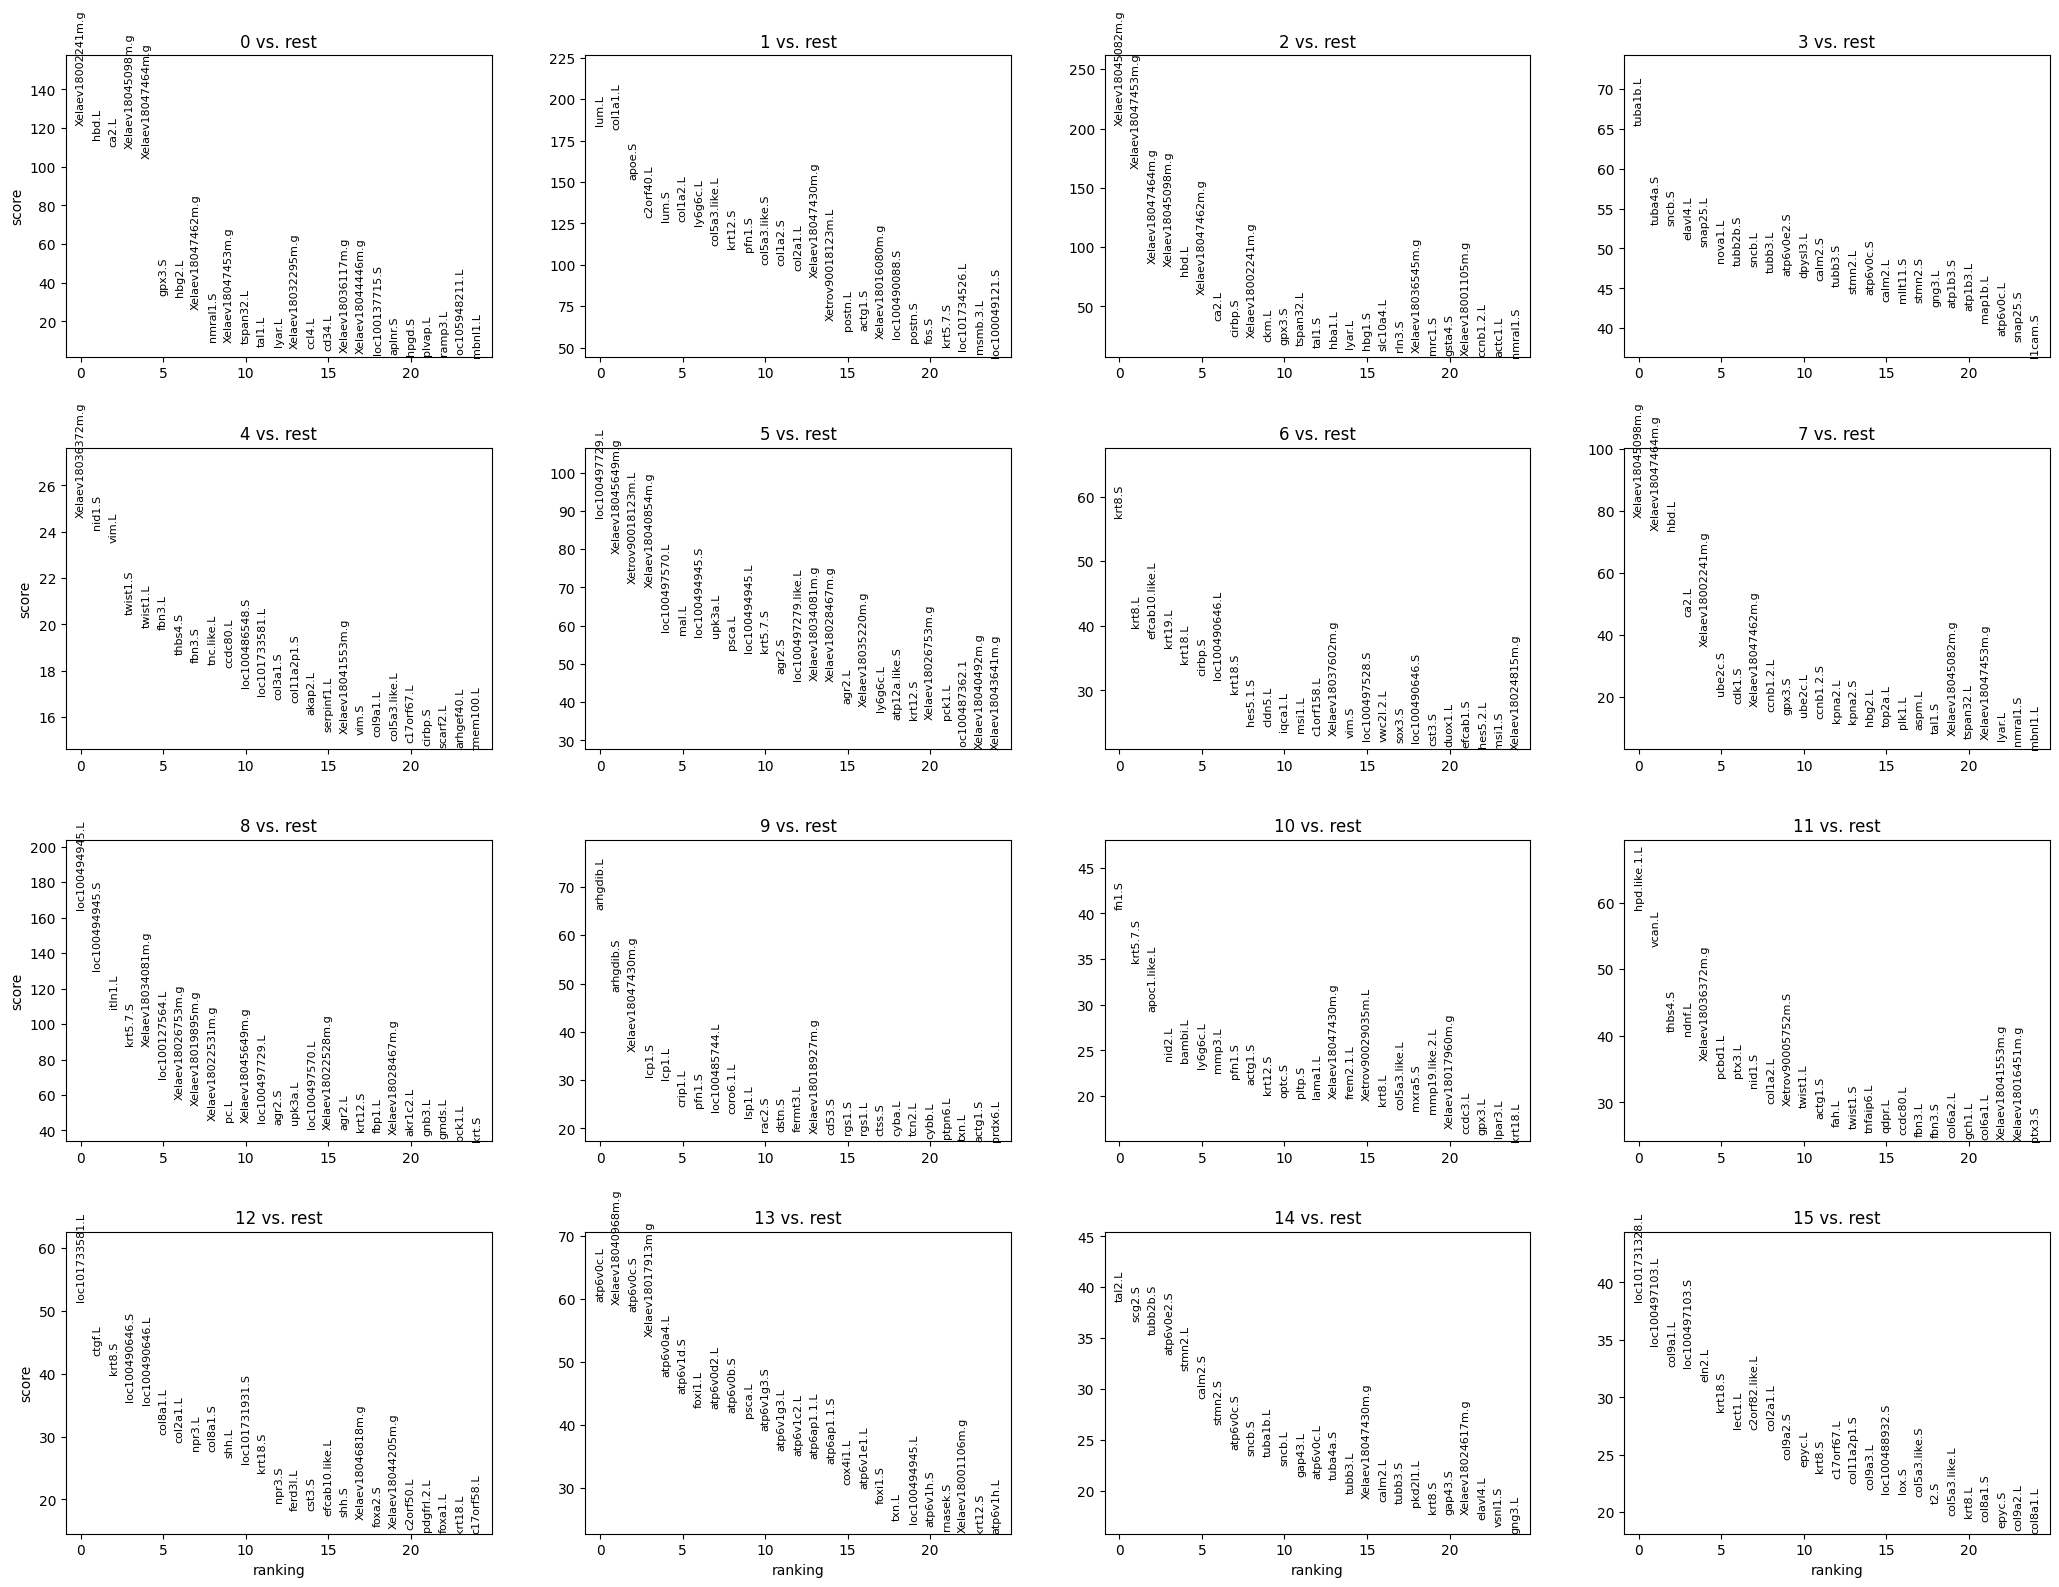

In [178]:
sc.pl.rank_genes_groups(hvg_adata, n_genes=25, sharey=False)

In [179]:
roc_markers_ttest = hvg_adata.uns['rank_genes_groups']['names']['10'][:50]

## 3. Wilcoxon

In [180]:
sc.tl.rank_genes_groups(hvg_adata, groupby="louvain_res_0.60", method="wilcoxon")

ranking genes
    finished (0:00:04)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

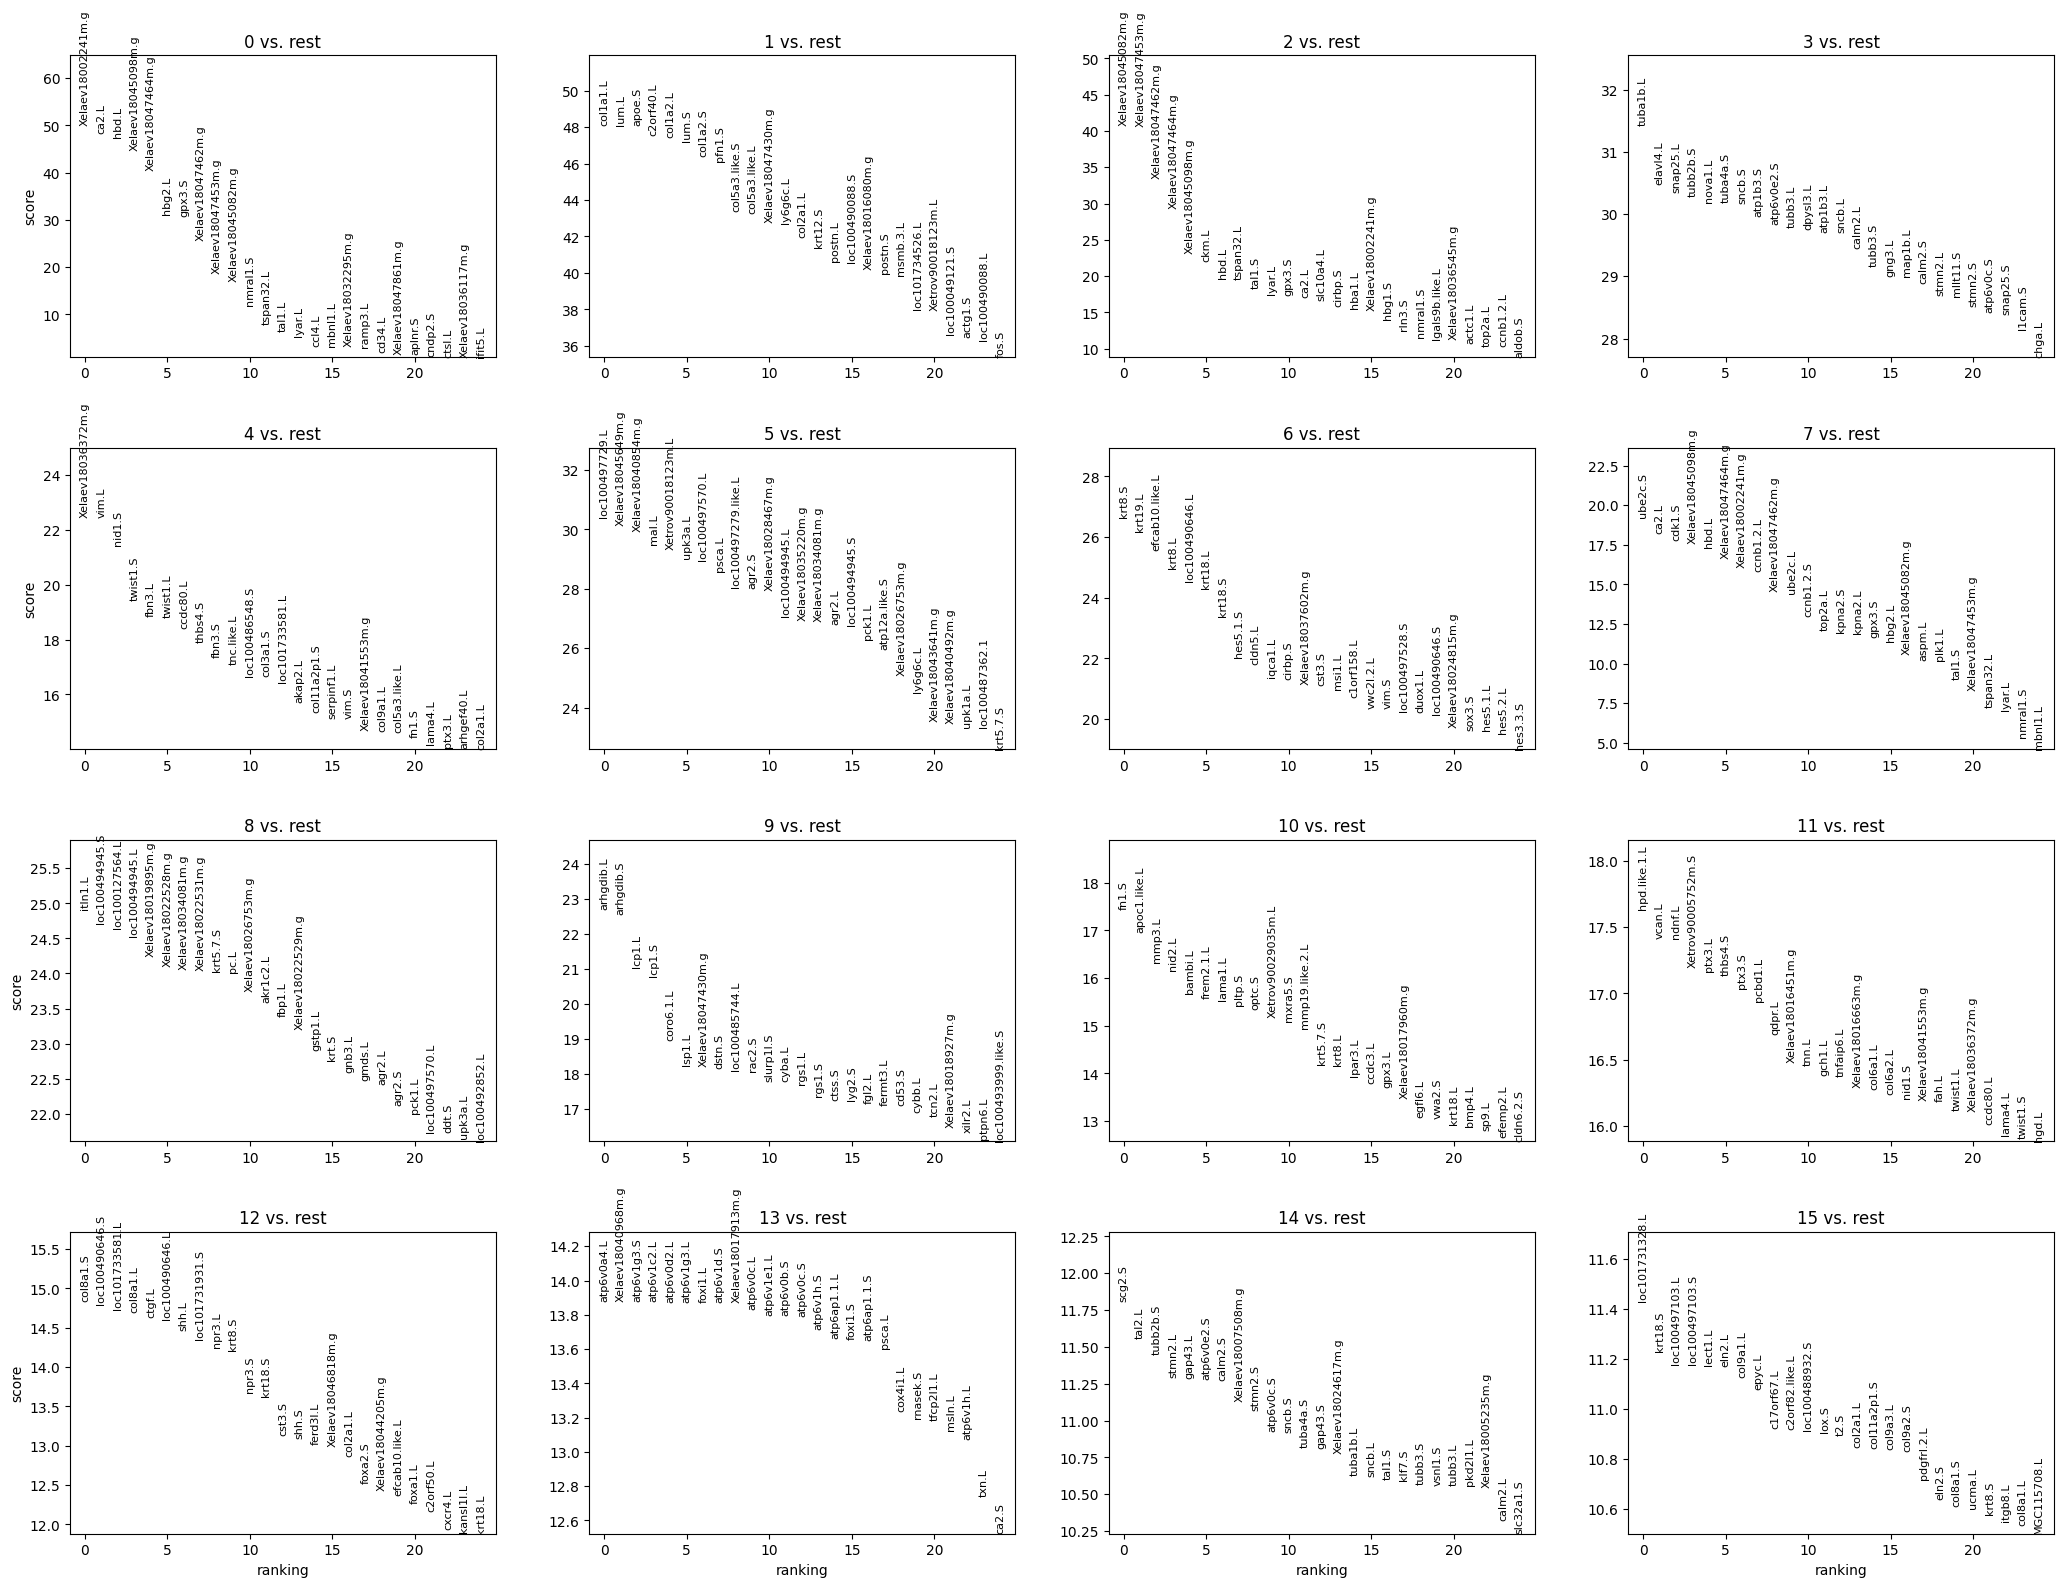

In [181]:
sc.pl.rank_genes_groups(hvg_adata, n_genes=25, sharey=False)

Show top ranked genes per cluster 0,...20 in a dataframe

In [182]:
import pandas as pd
pd.DataFrame(hvg_adata.uns['rank_genes_groups']['names']).head(5)

0          1                  2         3  \
0  Xelaev18002241m.g   col1a1.L  Xelaev18045082m.g  tuba1b.L   
1              ca2.L      lum.L  Xelaev18047453m.g  elavl4.L   
2              hbd.L     apoe.S  Xelaev18047462m.g  snap25.L   
3  Xelaev18045098m.g  c2orf40.L  Xelaev18047464m.g  tubb2b.S   
4  Xelaev18047464m.g   col1a2.L  Xelaev18045098m.g   nova1.L   

                   4                  5               6                  7  \
0  Xelaev18036372m.g     loc100497729.L          krt8.S            ube2c.S   
1              vim.L  Xelaev18045649m.g         krt19.L              ca2.L   
2             nid1.S  Xelaev18040854m.g  efcab10.like.L             cdk1.S   
3           twist1.S              mal.L          krt8.L  Xelaev18045098m.g   
4             fbn3.L  Xetrov90018123m.L  loc100490646.L              hbd.L   

                   8          9            10                 11  \
0            itln1.L  arhgdib.L         fn1.S       hpd.like.1.L   
1     loc100494945.S  arhgdib.S  apoc1.like.L             vcan.L   
2     loc100127564.L     lcp1.L        mmp3.L             ndnf.L   
3     loc100494945.L     lcp1.S        nid2.L  Xetrov90005752m.S   
4  Xelaev18019895m.g  coro6.1.L       bambi.L             ptx3.L   

               12                 13        14              15  
0        col8a1.S         atp6v0a4.L    scg2.S  loc101731328.L  
1  loc100490646.S  Xelaev18040968m.g    tal2.L         krt18.S  
2  loc101733581.L         atp6v1g3.S  tubb2b.S  loc100497103.L  
3        col8a1.L         atp6v1c2.L   stmn2.L  loc100497103.S  
4          ctgf.L         atp6v0d2.L   gap43.L         lect1.L

Single cluster (10)

ranking genes
    finished (0:00:01)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


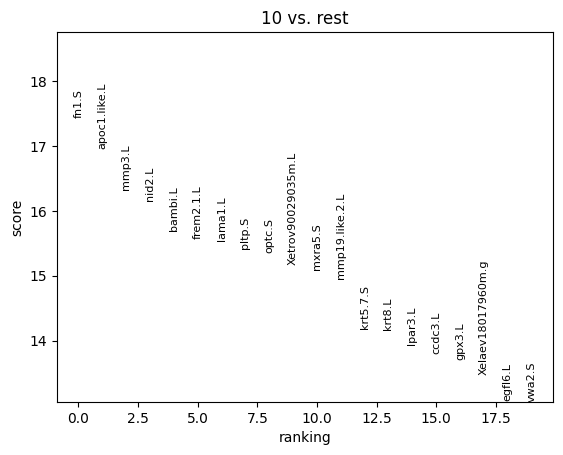

In [183]:
sc.tl.rank_genes_groups(hvg_adata, "louvain_res_0.60", groups=["10"], method="wilcoxon")
sc.pl.rank_genes_groups(hvg_adata, groups=["10"], n_genes=20)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


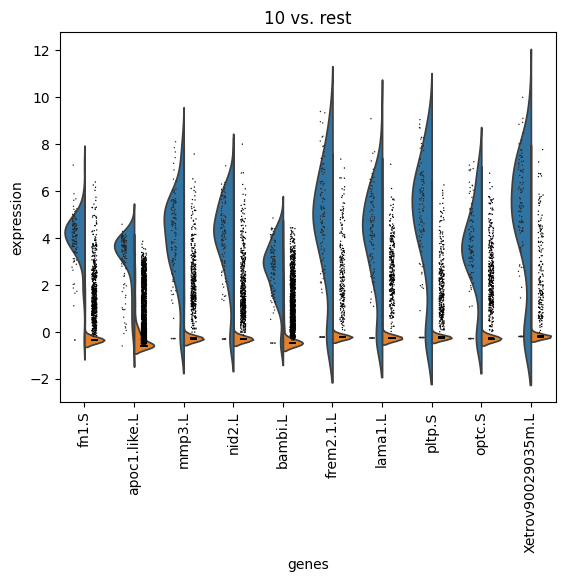

In [184]:
sc.pl.rank_genes_groups_violin(hvg_adata, groups="10", n_genes=10)

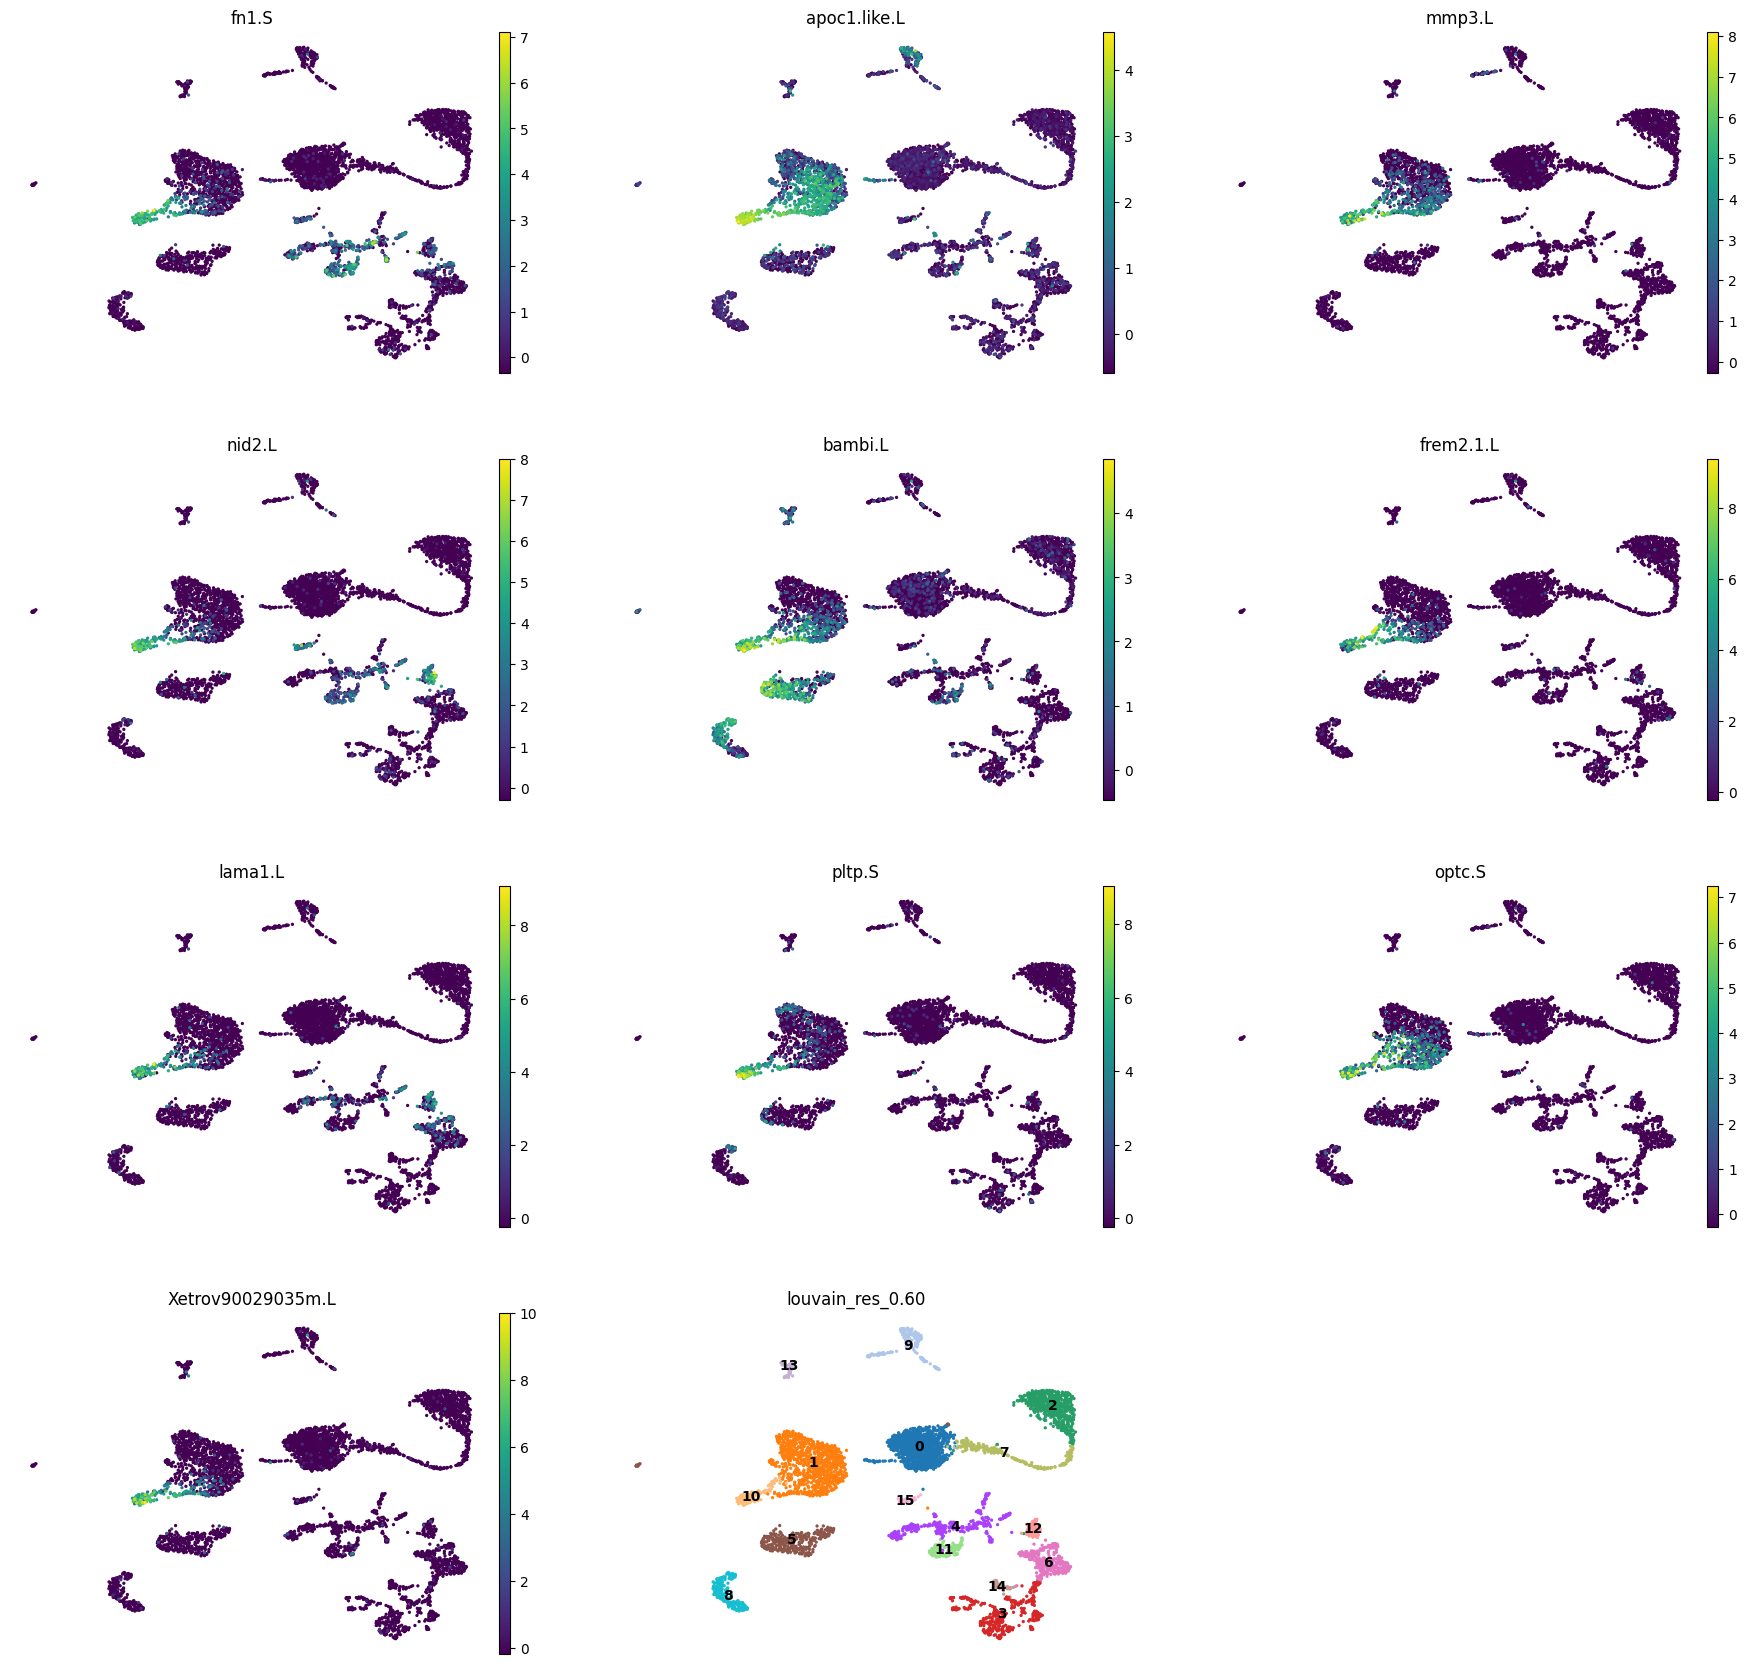

In [185]:
dc_cluster_genes = sc.get.rank_genes_groups_df(hvg_adata, group="10").head(10)["names"]
sc.pl.umap(
    hvg_adata,
    color=[*dc_cluster_genes, "louvain_res_0.60"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)

In [186]:
roc_markers_wilcoxon = hvg_adata.uns['rank_genes_groups']['names']['10'][:50]

In [187]:
roc_markers_wilcoxon

array(['fn1.S', 'apoc1.like.L', 'mmp3.L', 'nid2.L', 'bambi.L',
       'frem2.1.L', 'lama1.L', 'pltp.S', 'optc.S', 'Xetrov90029035m.L',
       'mxra5.S', 'mmp19.like.2.L', 'krt5.7.S', 'krt8.L', 'lpar3.L',
       'ccdc3.L', 'gpx3.L', 'Xelaev18017960m.g', 'egfl6.L', 'vwa2.S',
       'krt18.L', 'bmp4.L', 'sp9.L', 'efemp2.L', 'cldn6.2.S', 'bhlha9.S',
       'vwde.L', 'megf6.S', 'fgf7.L', 'hmcn1.L', 'tinagl1.S',
       'loc100490088.S', 'Xelaev18026267m.g', 'vcan.L', 'rspo2.L',
       'Xelaev18036372m.g', 'unc5b.L', 'cpa6.S', 'krt.L', 'cpa6.L',
       'fgf7.S', 'cldn6.1.S', 'fgf9.L', 'loc100486548.S', 'krt12.S',
       'Xelaev18047430m.g', 'actg1.S', 'loc100490088.L', 'col27a1.S',
       'dlx3.S'], dtype=object)

## Compare identified markers across methods

In [189]:
import pandas as pd

file_path = '/content/drive/MyDrive/STAT5243 Jiahui Zhu/MarkerList(SuppTable3).xlsx'
excel_data = pd.read_excel(file_path, sheet_name='ROC markers')
roc_markers_excel = excel_data.head(50)


roc_markers_wilcoxon = pd.Series(roc_markers_wilcoxon)
roc_markers_logist = pd.Series(roc_markers_logist)
roc_markers_ttest = pd.Series(roc_markers_ttest)

Any common markers with paper?

In [190]:
common_markers_1 = roc_markers_wilcoxon[roc_markers_wilcoxon.isin(roc_markers_excel)]
common_markers_2 = roc_markers_logist[roc_markers_logist.isin(roc_markers_excel)]
common_markers_3 = roc_markers_ttest[roc_markers_ttest.isin(roc_markers_excel)]

common_markers = pd.concat([common_markers_1, common_markers_2, common_markers_3])
common_markers

Series([], dtype: object)

Any common markers across methods?

In [191]:
common_markers_4 = roc_markers_wilcoxon[roc_markers_wilcoxon.isin(roc_markers_logist)]
common_markers_5 = roc_markers_logist[roc_markers_logist.isin(roc_markers_ttest)]
common_markers_6 = roc_markers_ttest[roc_markers_ttest.isin(roc_markers_wilcoxon)]

len(common_markers_4), len(common_markers_5), len(common_markers_6)

(20, 19, 46)

Markers identified by wilcoxon and t-test are most similar